In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
import csv
from sklearn.metrics import pairwise_distances

In [2]:
# From CSV-File to Graph and Adjecency Matrix

def CSVToGraphAndAdjecency(file) :
    
    # Uploading the file
    df = pd.read_csv(file)
    df.head()
    
    # Converting to categorized type of DataFrame
    df = convert(df, 6,6)
    df_cluster = df.iloc[:,0:5]
    
    # Converting to Graph
    W = pairwise_distances(df_cluster, metric="euclidean")
    Graph=nx.from_numpy_array(W)
    draw_graph(Graph)
    
    # Creating an adjecency matrix
    adj_matrix = nx.adjacency_matrix(Graph)
    print(adj_matrix.todense())
    
    return Graph, adj_matrix, df_cluster

In [3]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [4]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

[[  0.           1.13578167   2.06397674 ... 197.00926958 198.01406566
  199.00569288]
 [  1.13578167   0.           1.04403065 ... 196.01174531 197.01599478
  198.00754986]
 [  2.06397674   1.04403065   0.         ... 195.01370285 196.01800989
  197.00896376]
 ...
 [197.00926958 196.01174531 195.01370285 ...   0.           1.42642911
    2.05919887]
 [198.01406566 197.01599478 196.01800989 ...   1.42642911   0.
    1.44305232]
 [199.00569288 198.00754986 197.00896376 ...   2.05919887   1.44305232
    0.        ]]


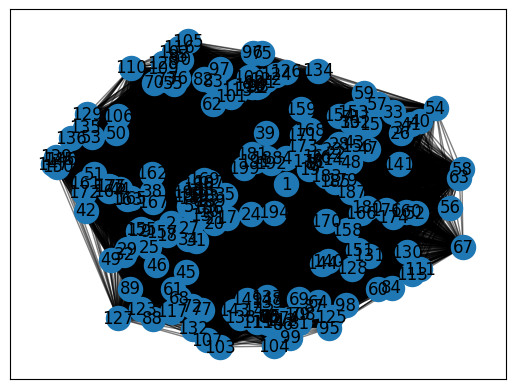

In [5]:
csv="..\\Iris _Mythica_Data_Set.csv"
Graph, adj_matrix, df_cluster = CSVToGraphAndAdjecency(csv)

In [6]:
# Creating Degree Matrix, Laplacian Matrix, printing the eigenvalues and eigenvectors

def bigFucntion(G, adj_matrix) :
    
    degrees = [val for (node, val) in Graph.degree()]
    
    # Degree matrix
    D = np.zeros((len(degrees), len(degrees)))
    np.fill_diagonal(D, degrees)
    print('degree matrix:')
    print(D)
    
    # laplacian matrix
    L = D - adj_matrix
    print('laplacian matrix:')
    print(L)
    
    # Eigenvalues and Eigenvectors
    e, v = np.linalg.eig(L)
    e = e.real
    v = v.real
    
    print('eigenvalues:')
    print(e)
    
    print('eigenvectors:')
    print(v)
    
    return D, L, e, v

In [7]:
DegreeMatrix, LaplacianMatrix, e, v = bigFucntion(Graph, adj_matrix)

degree matrix:
[[199.   0.   0. ...   0.   0.   0.]
 [  0. 199.   0. ...   0.   0.   0.]
 [  0.   0. 199. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 199.   0.   0.]
 [  0.   0.   0. ...   0. 199.   0.]
 [  0.   0.   0. ...   0.   0. 199.]]
laplacian matrix:
[[ 199.           -1.13578167   -2.06397674 ... -197.00926958
  -198.01406566 -199.00569288]
 [  -1.13578167  199.           -1.04403065 ... -196.01174531
  -197.01599478 -198.00754986]
 [  -2.06397674   -1.04403065  199.         ... -195.01370285
  -196.01800989 -197.00896376]
 ...
 [-197.00926958 -196.01174531 -195.01370285 ...  199.
    -1.42642911   -2.05919887]
 [-198.01406566 -197.01599478 -196.01800989 ...   -1.42642911
   199.           -1.44305232]
 [-199.00569288 -198.00754986 -197.00896376 ...   -2.05919887
    -1.44305232  199.        ]]
eigenvalues:
[-13712.5771615    8298.65700205   2753.03488112   1096.68416229
    727.48864515    521.43873128    429.40804006    362.87300839
    324.50748459    297.89096999    280.